<a href="https://colab.research.google.com/github/hmyrcmn/MachinaLearning/blob/main/hauseData_analize_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


Kategorik Sütunlar:

"Suburb": Şehir veya semt gibi kategori değerleri içeriyor gibi görünüyor.

"Address": Ev adresi gibi benzersiz metin değerleri içeriyor.

"Type": Evin tipini temsil eden kategori değerleri içeriyor (örneğin, "h" veya "t").

"Method": Satış yöntemini temsil eden kategori değerleri içeriyor (örneğin, "S" veya "SS").

"SellerG": Evin satıcısını temsil eden kategori değerleri içeriyor.

"CouncilArea": Konsey alanını temsil eden kategori değerleri içeriyor.


Sayısal Sütunlar:


"Rooms": Oda sayısı gibi tam sayı değerleri içeriyor.

"Price": Evin fiyatını temsil eden ondalık sayı değerleri içeriyor.

"Distance": Şehir merkezine uzaklığı temsil eden ondalık sayı değerleri içeriyor.

"Postcode": Posta kodunu temsil eden tam sayı değerleri içeriyor.

"Bathroom" ve "Car": Oda sayısı gibi tam sayı değerleri içeriyor.



In [100]:
import pandas as pd
data = pd.read_csv('/content/Melbourne_housing_FULL.csv')

# Okunan veriyi görüntüle
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [102]:
data.shape

(34857, 21)

In [103]:
data.size

731997

In [104]:
data.ndim

2

null deger varmı veride varsa onların düzenlenmesi gerek


In [105]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [106]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [107]:
# Yineleme verilerini kontrol etme
data = data.drop_duplicates()
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [108]:
nunique_counts = data.nunique()
data.nunique()
# 10 üstündekiler numerik  10 altındakiler kategorik


Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [109]:
# Kategorik ve sayısal sütunları depolamak için boş listeler oluşturun
categorical_columns = []
numeric_columns = []

# Sütunları taramak ve ayırt etmek için bir döngü kullanın
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

# Kategorik ve sayısal sütunları görüntüleyin
print("Kategorik Sütunlar:")
print(categorical_columns)
print("\nSayısal Sütunlar:")
print(numeric_columns)

Kategorik Sütunlar:
['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']

Sayısal Sütunlar:
['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']


In [110]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [111]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [112]:
# Aykırı verileri z-skor yöntemi ile tespit etme ve temizleme
from scipy import stats
z_scores = np.abs(stats.zscore(data[['Landsize', 'BuildingArea']]))
data = data[(z_scores < 3).all(axis=1)]


In [113]:
# Eksik değer içeren sayısal sütunların adlarını belirleyin
numeric_columns_with_missing_values = ['Rooms', 'Distance', 'Bathroom', 'Car', ...]

# SimpleImputer'ı oluşturun
imputer = SimpleImputer(strategy='mean')

# Her bir eksik değer içeren sayısal sütun için eksik değerleri doldurun
data[numeric_columns_with_missing_values] = imputer.fit_transform(data[numeric_columns_with_missing_values])

# Eksik değer sayısını kontrol edin
missing_values_count = data.isnull().sum()
print("Eksik değer sayısı:", missing_values_count)


KeyError: ignored

In [ ]:
data.isnull().sum()

In [ ]:

# Fiyat dağılımını görselleştirme
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Sayı')
plt.show()



In [ ]:
# Sayısal değişkenlerin fiyat ile ilişkisini gösteren çift çizim
sns.pairplot(data[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']])
plt.show()


In [ ]:
# Korelasyon matrisini gösteren ısı haritası
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


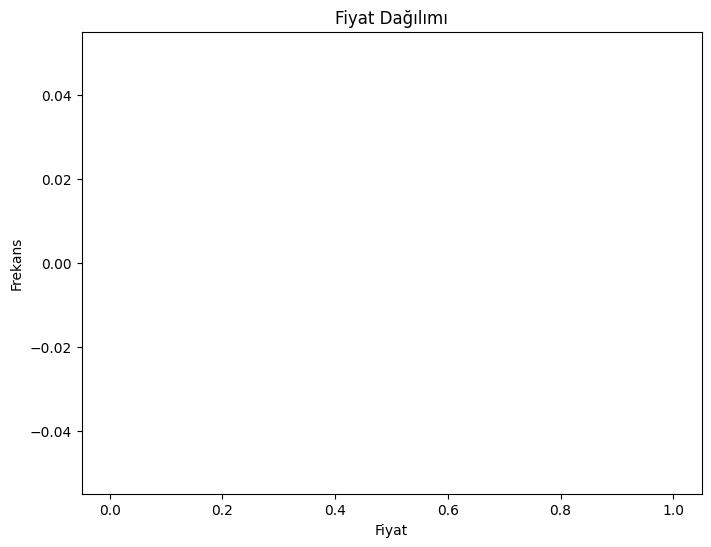

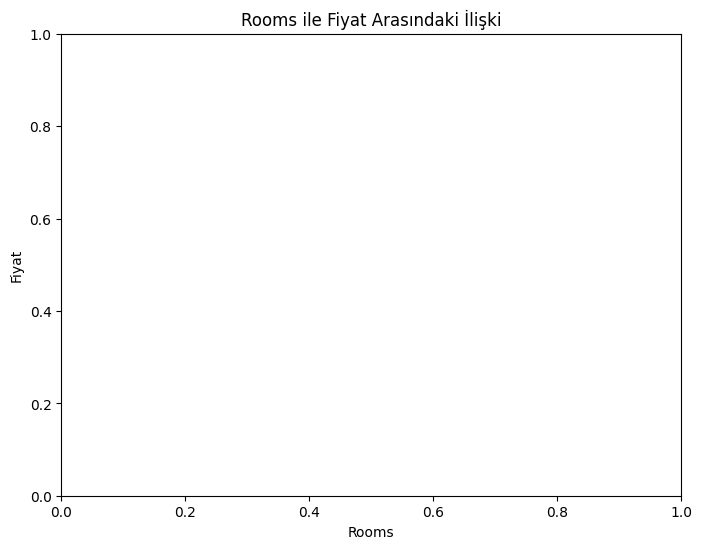

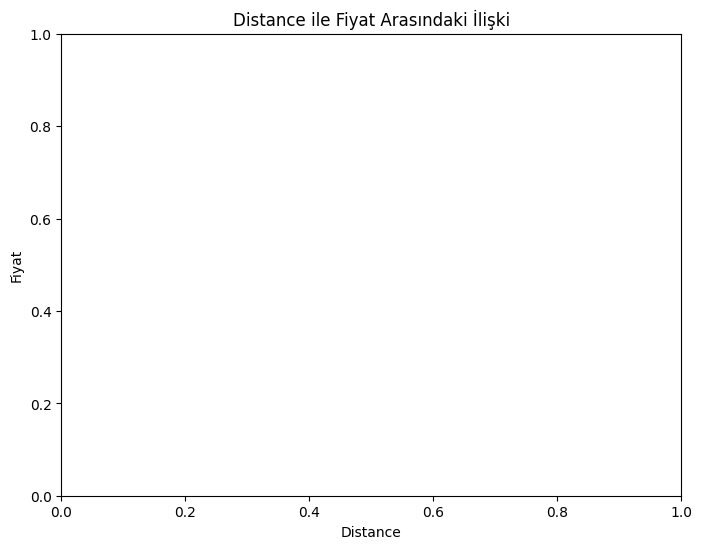

<ipython-input-115-d97bc7c6c822>:31: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = encoded_data.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


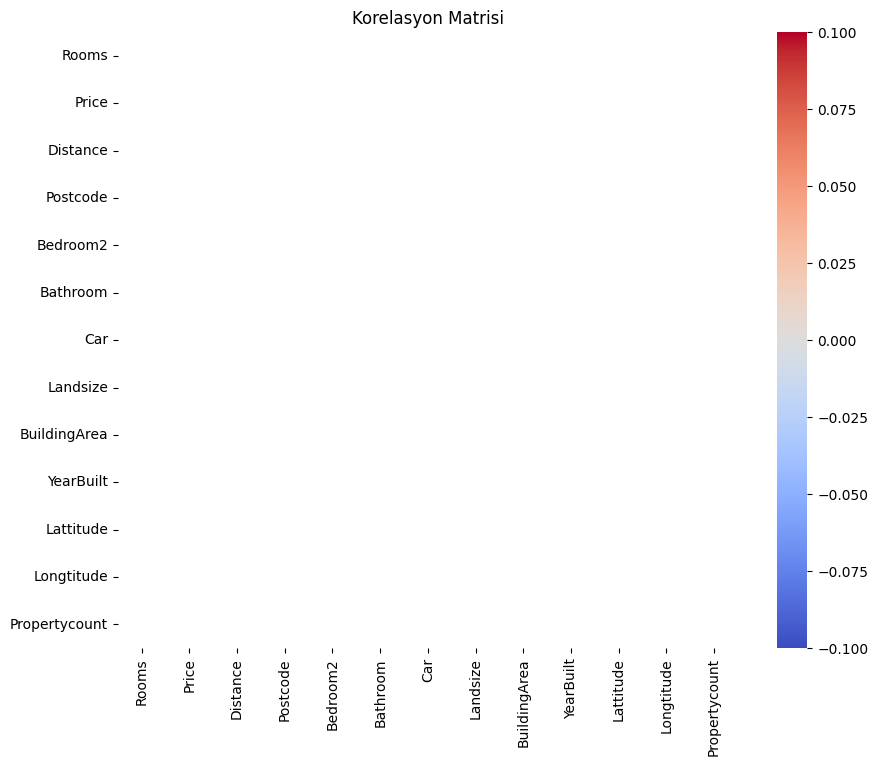

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fiyat dağılımını görselleştirme
plt.figure(figsize=(8, 6))
plt.hist(data['Price'], bins=30, color='blue')
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

# Örnek olarak iki sayısal sütun seçelim (örneğin, 'Rooms' ve 'Distance')
numerical_columns = ['Rooms', 'Distance']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='Price')
    plt.title(f"{column} ile Fiyat Arasındaki İlişki")
    plt.xlabel(column)
    plt.ylabel("Fiyat")
    plt.show()

# Kategorik sütunları belirleyin (örneğin, 'Type', 'Method', 'Regionname')
categorical_columns = ['Type', 'Method', 'Regionname']

# Kategorik değişkenleri one-hot encoding ile işleyin
encoded_data = pd.get_dummies(data, columns=categorical_columns)

# Korelasyon matrisini hesaplayın
correlation_matrix = encoded_data.corr()

# Korelasyon matrisini görselleştirin
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()
